### **Exploratory Data Analysis on Online Course Enrollment Data**


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import gensim
import nltk as nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim import corpora

%matplotlib inline

In [2]:
course_df = pd.read_csv('course_genre.csv')
ratings_df = pd.read_csv('ratings.csv')

In [3]:
course_df.columns

Index(['COURSE_ID', 'TITLE', 'Database', 'Python', 'CloudComputing',
       'DataAnalysis', 'Containers', 'MachineLearning', 'ComputerVision',
       'DataScience', 'BigData', 'Chatbot', 'R', 'BackendDev', 'FrontendDev',
       'Blockchain'],
      dtype='object')

In [4]:
course_df.shape[0]

307

In [5]:
course_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307 entries, 0 to 306
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   COURSE_ID        307 non-null    object
 1   TITLE            307 non-null    object
 2   Database         307 non-null    int64 
 3   Python           307 non-null    int64 
 4   CloudComputing   307 non-null    int64 
 5   DataAnalysis     307 non-null    int64 
 6   Containers       307 non-null    int64 
 7   MachineLearning  307 non-null    int64 
 8   ComputerVision   307 non-null    int64 
 9   DataScience      307 non-null    int64 
 10  BigData          307 non-null    int64 
 11  Chatbot          307 non-null    int64 
 12  R                307 non-null    int64 
 13  BackendDev       307 non-null    int64 
 14  FrontendDev      307 non-null    int64 
 15  Blockchain       307 non-null    int64 
dtypes: int64(14), object(2)
memory usage: 38.5+ KB


For example, the following course id `ML0122EN` is associated with genres `Python`, `MachineLearning`, and `DataScience`


In [6]:
course_df.head()

,COURSE_ID,TITLE,Database,Python,CloudComputing,DataAnalysis,Containers,MachineLearning,ComputerVision,DataScience,BigData,Chatbot,R,BackendDev,FrontendDev,Blockchain
0,ML0201EN,Robots Are Coming Build Iot Apps With Watson ...,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1,ML0122EN,Accelerating Deep Learning With Gpu,0,1,0,0,0,1,0,1,0,0,0,0,0,0
2,GPXX0ZG0EN,Consuming Restful Services Using The Reactive ...,0,0,0,0,0,0,0,0,0,0,0,1,1,0
3,RP0105EN,Analyzing Big Data In R Using Apache Spark,1,0,0,1,0,0,0,0,1,0,1,0,0,0
4,GPXX0Z2PEN,Containerizing Packaging And Running A Sprin...,0,0,0,0,1,0,0,0,0,0,0,1,0,0


In [7]:
course_df.iloc[1, ]

COURSE_ID                                     ML0122EN
TITLE              Accelerating Deep Learning With Gpu
Database                                             0
Python                                               1
CloudComputing                                       0
DataAnalysis                                         0
Containers                                           0
MachineLearning                                      1
ComputerVision                                       0
DataScience                                          1
BigData                                              0
Chatbot                                              0
R                                                    0
BackendDev                                           0
FrontendDev                                          0
Blockchain                                           0
Name: 1, dtype: object

In [8]:
titles = " ".join(title for title in course_df['TITLE'].astype(str)).strip()
titles

'Robots Are Coming  Build Iot Apps With Watson  Swift  And Node Red Accelerating Deep Learning With Gpu Consuming Restful Services Using The Reactive Jax Rs Client Analyzing Big Data In R Using Apache Spark Containerizing  Packaging  And Running A Spring Boot Application Cloud Native Security Conference  Data Security Data Science Bootcamp With R For University Proffesors Learn How To Use Docker Containers For Iterative Development Scorm Test Course Create Your First Mongodb Database Testing Microservices With The Arquillian Managed Container Cloud Pak For Integration Essentials Watson Analytics For Social Media Data Science Bootcamp With Python For University Professors  Advance Create A Cryptocurrency Trading Algorithm In Python Data   Ai Essentials Securing Java Microservices With Eclipse Microprofile Json Web Token  Microprofile Jwt Enabling Distributed Tracing In Microservices With Zipkin Sql Access For Hadoop Ybrid Cloud Conference  Ai Pipelines Lab Dataops Methodology Data   Ai 

In [9]:
stopword = set(STOPWORDS) # List of english stopword
stopword.update(["getting started", "using", "enabling", "template", "university", "end", "introduction", "basic"])

In [10]:
wordcloud = WordCloud(stopwords=stopword, background_color="white", width=800, height=400)

In [11]:
wordcloud.generate(titles)

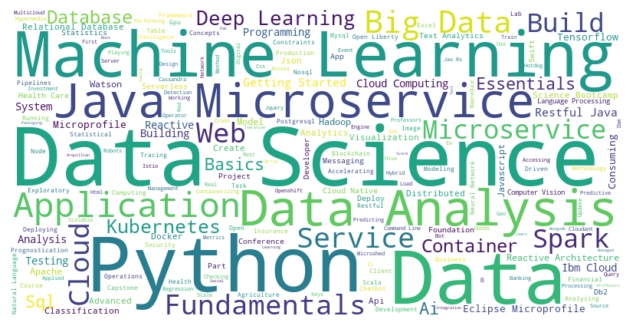

In [12]:
plt.axis("off")
plt.tight_layout(pad=1)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

As we can see from the `wordcloud`,  there are many popular IT related keywords such as python, data science, machine learning, big data, ai, tensorflow, container, cloud, etc. By looking at these keywords, we should have a general understanding that the courses in the dataset are focused on demanding IT skills.

#### Analyzing Course Genres

In [13]:
course_ml_df = course_df[course_df['MachineLearning'] == 1]
course_ml_df

,COURSE_ID,TITLE,Database,Python,CloudComputing,DataAnalysis,Containers,MachineLearning,ComputerVision,DataScience,BigData,Chatbot,R,BackendDev,FrontendDev,Blockchain
1,ML0122EN,Accelerating Deep Learning With Gpu,0,1,0,0,0,1,0,1,0,0,0,0,0,0
15,DAI101EN,Data Ai Essentials,0,0,0,0,0,1,0,0,0,0,0,0,0,0
19,HCC105EN,Ybrid Cloud Conference Ai Pipelines Lab,0,0,0,0,0,1,0,0,0,0,0,0,0,0
21,DS0132EN,Data Ai Jumpstart Your Journey,0,0,0,0,0,1,0,0,0,0,0,0,0,0
24,BENTEST4,Ai For Everyone Master The Basics,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,excourse61,Convolutional Neural Networks In Tensorflow,0,0,0,0,0,1,1,0,0,0,0,0,0,0
282,excourse69,Machine Learning With Big Data,0,0,0,0,0,1,0,0,1,0,0,0,0,0
290,excourse77,Natural Language Processing With Attention Models,0,0,0,0,0,1,0,0,0,0,0,0,0,0
291,excourse78,Natural Language Processing With Sequence Models,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [14]:
course_ml_bd_df = course_df[(course_df['MachineLearning'] == 1) & (course_df['BigData'] == 1)]
course_ml_bd_df

,COURSE_ID,TITLE,Database,Python,CloudComputing,DataAnalysis,Containers,MachineLearning,ComputerVision,DataScience,BigData,Chatbot,R,BackendDev,FrontendDev,Blockchain
46,GPXX0BUBEN,Insurance Risk Assessment With Montecarlo Meth...,0,0,0,0,0,1,0,0,1,0,0,0,0,0
59,TA0106EN,Text Analytics At Scale,0,0,0,0,0,1,0,1,1,0,0,0,0,0
184,BD0221EN,Spark Mllib,0,0,0,0,0,1,0,0,1,0,0,0,0,0
282,excourse69,Machine Learning With Big Data,0,0,0,0,0,1,0,0,1,0,0,0,0,0


In [15]:
genres = course_df.columns[2:]
genres

Index(['Database', 'Python', 'CloudComputing', 'DataAnalysis', 'Containers',
       'MachineLearning', 'ComputerVision', 'DataScience', 'BigData',
       'Chatbot', 'R', 'BackendDev', 'FrontendDev', 'Blockchain'],
      dtype='object')

In [16]:
x = pd.DataFrame(course_df.iloc[:,2:].sum().sort_values(ascending=False)).reset_index().rename(columns = {'index' : 'Genre',0 :'Count'})
x

,Genre,Count
0,BackendDev,78
1,MachineLearning,69
2,Database,60
3,DataAnalysis,56
4,DataScience,38
5,CloudComputing,37
6,BigData,36
7,Python,28
8,FrontendDev,19
9,Containers,17


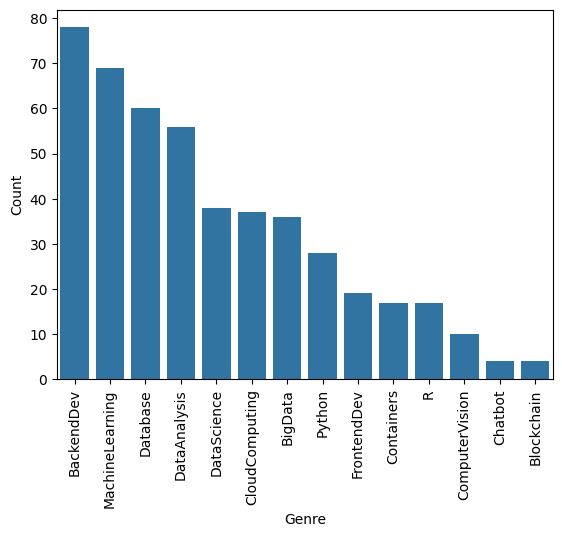

In [17]:
sns.barplot(data=x, x="Genre", y="Count")
plt.xticks(rotation=90)
plt.show()

#### Analyzing Course Enrollments


This dataset contains three colums, `user` representing a unique user id, `item` representing a course id, and `rating` representing a course enrollment mode.

In an online learning scenario, we have learners or students as users who enrolled courses. In fact, to follow the standard recommender system naming convention, we call each learner as a `user`, each course an `item`, and the enrollment mode or interaction as `rating`. So that's why we have columns named `user`, `item`, and `rating` instead of using `learner`, `course`, and `enrollment`.


In [18]:
ratings_df.head()

,user,item,rating
0,1889878,CC0101EN,3.0
1,1342067,CL0101EN,3.0
2,1990814,ML0120ENv3,3.0
3,380098,BD0211EN,3.0
4,779563,DS0101EN,3.0


The rating column contains one of two values: `2` means the user just audited the course without completing it and `3` means the user completed the course and earned a certificate.

In [19]:
ratings_df['rating'].unique()

array([3., 2.])

In [20]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233306 entries, 0 to 233305
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   user    233306 non-null  int64  
 1   item    233306 non-null  object 
 2   rating  233306 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 5.3+ MB


In [21]:
ratings_df['rating'].describe()

count    233306.000000
mean          2.952954
std           0.211737
min           2.000000
25%           3.000000
50%           3.000000
75%           3.000000
max           3.000000
Name: rating, dtype: float64

In [22]:
ratings_df.shape[0]

233306

We have 233306 enrollments. In fact, each user is likely to interact with multiple items so let's find the rating counts for each user:

In [23]:
user_count_df = ratings_df.groupby('user')['user'].count()
user_count_df

user
2          61
4          44
5          59
7           1
8           3
           ..
2102054     8
2102356     1
2102680    11
2102983     1
2103039     1
Name: user, Length: 33901, dtype: int64

After the aggregation, you should get a new dataframe showing the rating count for each user. For example, user 4 rated 44 items and user 2 rated 61 items

In [24]:
user_count_df.describe()

count    33901.000000
mean         6.881980
std          5.823548
min          1.000000
25%          2.000000
50%          6.000000
75%          9.000000
max         61.000000
Name: user, dtype: float64

<Axes: >

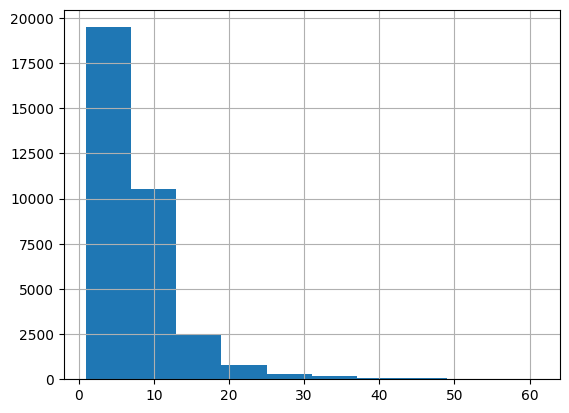

In [25]:
user_count_df.hist()

### Top-20 Most Popular Courses

In [26]:
course_count_df = pd.DataFrame(ratings_df.groupby('item').size().sort_values(ascending=False)[:20]).reset_index().rename(columns={'item': 'COURSE_ID', 0: 'Count'})
course_count_df

,COURSE_ID,Count
0,PY0101EN,14936
1,DS0101EN,14477
2,BD0101EN,13291
3,BD0111EN,10599
4,DA0101EN,8303
5,DS0103EN,7719
6,ML0101ENv3,7644
7,BD0211EN,7551
8,DS0105EN,7199
9,BC0101EN,6719


In [27]:
pd.merge(course_count_df, course_df[['COURSE_ID','TITLE']],on='COURSE_ID', how='left')

,COURSE_ID,Count,TITLE
0,PY0101EN,14936,Python For Data Science
1,DS0101EN,14477,Introduction To Data Science
2,BD0101EN,13291,Big Data 101
3,BD0111EN,10599,Hadoop 101
4,DA0101EN,8303,Data Analysis With Python
5,DS0103EN,7719,Data Science Methodology
6,ML0101ENv3,7644,Machine Learning With Python
7,BD0211EN,7551,Spark Fundamentals I
8,DS0105EN,7199,Data Science Hands On With Open Source Tools
9,BC0101EN,6719,Blockchain Essentials


It seems that those popular courses take a huge amount of total ratings. Let's find the exact percentage.


In [28]:
print(f"Percentage of the top 20 course enrollments {round(course_count_df['Count'].sum()/ratings_df.shape[0] * 100 , 2)} %")

Percentage of the top 20 course enrollments 63.3 %


### **Extracting Bag of Words (BoW) Features from Course Textual Content**


In [29]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Manoj\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Manoj\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Manoj\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [30]:
course_content_df = pd.read_csv('course_processed.csv')
course_content_df

,COURSE_ID,TITLE,DESCRIPTION
0,ML0201EN,Robots Are Coming Build Iot Apps With Watson ...,Have Fun With Iot And Learn Along The Way If ...
1,ML0122EN,Accelerating Deep Learning With Gpu,Training Complex Deep Learning Models With Lar...
2,GPXX0ZG0EN,Consuming Restful Services Using The Reactive ...,Learn How To Use A Reactive Jax Rs Client To A...
3,RP0105EN,Analyzing Big Data In R Using Apache Spark,Apache Spark Is A Popular Cluster Computing Fr...
4,GPXX0Z2PEN,Containerizing Packaging And Running A Sprin...,Learn How To Containerize Package And Run A ...
...,...,...,...
302,excourse89,Javascript Jquery And Json,In This Course We Ll Look At The Javascript L...
303,excourse90,Programming Foundations With Javascript Html ...,Learn Foundational Programming Concepts E G ...
304,excourse91,Front End Web Development With React,This Course Explores Javascript Based Front En...
305,excourse92,Introduction To Web Development,This Course Is Designed To Start You On A Path...


In [31]:
course_content_df['course_texts'] = course_content_df[['TITLE', 'DESCRIPTION']].agg(' '.join, axis=1)
course_content_df

,COURSE_ID,TITLE,DESCRIPTION,course_texts
0,ML0201EN,Robots Are Coming Build Iot Apps With Watson ...,Have Fun With Iot And Learn Along The Way If ...,Robots Are Coming Build Iot Apps With Watson ...
1,ML0122EN,Accelerating Deep Learning With Gpu,Training Complex Deep Learning Models With Lar...,Accelerating Deep Learning With Gpu Training C...
2,GPXX0ZG0EN,Consuming Restful Services Using The Reactive ...,Learn How To Use A Reactive Jax Rs Client To A...,Consuming Restful Services Using The Reactive ...
3,RP0105EN,Analyzing Big Data In R Using Apache Spark,Apache Spark Is A Popular Cluster Computing Fr...,Analyzing Big Data In R Using Apache Spark Apa...
4,GPXX0Z2PEN,Containerizing Packaging And Running A Sprin...,Learn How To Containerize Package And Run A ...,Containerizing Packaging And Running A Sprin...
...,...,...,...,...
302,excourse89,Javascript Jquery And Json,In This Course We Ll Look At The Javascript L...,Javascript Jquery And Json In This Course W...
303,excourse90,Programming Foundations With Javascript Html ...,Learn Foundational Programming Concepts E G ...,Programming Foundations With Javascript Html ...
304,excourse91,Front End Web Development With React,This Course Explores Javascript Based Front En...,Front End Web Development With React This Cour...
305,excourse92,Introduction To Web Development,This Course Is Designed To Start You On A Path...,Introduction To Web Development This Course Is...


In [32]:
course_content_df.iloc[0, :]

COURSE_ID                                                ML0201EN
TITLE           Robots Are Coming  Build Iot Apps With Watson ...
DESCRIPTION     Have Fun With Iot And Learn Along The Way  If ...
course_texts    Robots Are Coming  Build Iot Apps With Watson ...
Name: 0, dtype: object

In [33]:
def tokenize_course(course, keep_only_nouns=True):
    
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(course)
    word_tokens = [w for w in word_tokens if (not w.lower() in stop_words) and (not w.isnumeric())]
    
    if keep_only_nouns:
        filter_list = ['WDT', 'WP', 'WRB', 'FW', 'IN', 'JJR', 'JJS', 'MD', 'PDT', 'POS', 'PRP', 'RB', 'RBR', 'RBS','RP']
        tags = nltk.pos_tag(word_tokens)
        word_tokens = [word for word, pos in tags if pos not in filter_list]

    return word_tokens

In [34]:
tokenized_courses = [tokenize_course(course_text) for course_text in course_content_df['course_texts']]
tokenized_courses[:2]

[['Robots',
  'Coming',
  'Build',
  'Iot',
  'Apps',
  'Watson',
  'Swift',
  'Node',
  'Red',
  'Fun',
  'Iot',
  'Learn',
  'Along',
  'Way',
  'Swift',
  'Developer',
  'Want',
  'Learn',
  'Iot',
  'Watson',
  'Ai',
  'Services',
  'Cloud',
  'Raspberry',
  'Pi',
  'Node',
  'Red',
  'Found',
  'Right',
  'Place',
  'Build',
  'Iot',
  'Apps',
  'Read',
  'Temperature',
  'Data',
  'Take',
  'Pictures',
  'Raspcam',
  'Use',
  'Ai',
  'Recognize',
  'Objects',
  'Pictures',
  'Program',
  'Irobot',
  'Create',
  'Robot'],
 ['Accelerating',
  'Deep',
  'Learning',
  'Gpu',
  'Training',
  'Complex',
  'Deep',
  'Learning',
  'Models',
  'Large',
  'Datasets',
  'Takes',
  'Along',
  'Time',
  'Course',
  'Learn',
  'Use',
  'Accelerated',
  'Gpu',
  'Hardware',
  'Overcome',
  'Scalability',
  'Problem',
  'Deep',
  'Learning',
  'Use',
  'Accelerated',
  'Hardware',
  'Google',
  'Tensor',
  'Processing',
  'Unit',
  'Tpu',
  'Nvidia',
  'Gpu',
  'Accelerate',
  'Convolutional',
 

In [35]:
tokens_dict = gensim.corpora.Dictionary(tokenized_courses)
tokens_dict.token2id

{'Ai': 0,
 'Along': 1,
 'Apps': 2,
 'Build': 3,
 'Cloud': 4,
 'Coming': 5,
 'Create': 6,
 'Data': 7,
 'Developer': 8,
 'Found': 9,
 'Fun': 10,
 'Iot': 11,
 'Irobot': 12,
 'Learn': 13,
 'Node': 14,
 'Objects': 15,
 'Pi': 16,
 'Pictures': 17,
 'Place': 18,
 'Program': 19,
 'Raspberry': 20,
 'Raspcam': 21,
 'Read': 22,
 'Recognize': 23,
 'Red': 24,
 'Right': 25,
 'Robot': 26,
 'Robots': 27,
 'Services': 28,
 'Swift': 29,
 'Take': 30,
 'Temperature': 31,
 'Use': 32,
 'Want': 33,
 'Watson': 34,
 'Way': 35,
 'Accelerate': 36,
 'Accelerated': 37,
 'Accelerating': 38,
 'Analyze': 39,
 'Based': 40,
 'Benefit': 41,
 'Caffe': 42,
 'Case': 43,
 'Chips': 44,
 'Classification': 45,
 'Comfortable': 46,
 'Complex': 47,
 'Computations': 48,
 'Convolutional': 49,
 'Course': 50,
 'Datasets': 51,
 'Deep': 52,
 'Dependencies': 53,
 'Deploy': 54,
 'Designed': 55,
 'Feel': 56,
 'Google': 57,
 'Gpu': 58,
 'Hardware': 59,
 'House': 60,
 'Ibm': 61,
 'Images': 62,
 'Including': 63,
 'Inference': 64,
 'Large': 65

In [36]:
courses_bow = [tokens_dict.doc2bow(course) for course in tokenized_courses]
courses_bow[:1]

[[(0, 2),
  (1, 1),
  (2, 2),
  (3, 2),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 4),
  (12, 1),
  (13, 2),
  (14, 2),
  (15, 1),
  (16, 1),
  (17, 2),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 2),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 2),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 2),
  (35, 1)]]

##### Course Bag of Words (BoW) Features

*   'doc_index': the course index starting from 0
*   'doc_id': the actual course id such as `ML0201EN`
*   'token': the tokens for each course
*   'bow': the bow value for each token

In [37]:
doc_index = []
doc_id = []
bags_of_token = []
bow = []

for idx, bag in enumerate(courses_bow):
    for word in bag:
        token = tokens_dict[word[0]]
        doc_index.append(idx)
        doc_id.append(course_content_df['COURSE_ID'][idx])
        bags_of_token.append(token)
        bow.append(word[1])


bow_dicts = {"doc_index": doc_index,
           "doc_id": doc_id,
            "token": bags_of_token,
            "bow": bow}

courses_bows = pd.DataFrame(bow_dicts)
courses_bows

,doc_index,doc_id,token,bow
0,0,ML0201EN,Ai,2
1,0,ML0201EN,Along,1
2,0,ML0201EN,Apps,2
3,0,ML0201EN,Build,2
4,0,ML0201EN,Cloud,1
...,...,...,...,...
10863,306,excourse93,Objectives,1
10864,306,excourse93,Pieces,1
10865,306,excourse93,Plugins,1
10866,306,excourse93,Populate,1


In [38]:
courses_bows.to_csv('courses_bows.csv', index= False)